# BÀI TẬP MATPLOTLIB

## Đề Bài

1. Sử dụng dữ liệu bán hàng 'sale_data_vn.csv':
    - Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo:
        - City (Hà Nội, TP HCM, Đà Nẵng).
        - Gender.
    - Vẽ biểu đồ histogram về phân bố Total, Rating:
        - Phân bố chung.
        - Theo City, theo Gender.
    - Vẽ biểu đồ scatter về mối liên hệ giữa Total và Rating.
    - Vẽ biểu đồ tree-map cho các Product line.
2. Rút ra nhận xét cho các biểu đồ ở trên.
3. Yêu cầu:
    - Bố cục trình bày: cần tổ chức các subplots phù hợp cho từng yêu cầu trên.

## Script

### Using

In [1]:
import squarify
import pandas as pd
import matplotlib.pyplot as plt

### Fields

In [2]:
CN_CT = 'City'  # column name city
CN_GD = 'Gender'  # column name gender
CN_TT = 'Total'  # column name total
CN_RT = 'Rating'  # column name rating

In [3]:
FOCUS_CITIES = ['Hà Nội', 'TP HCM', 'Đà Nẵng']

In [4]:
df = pd.read_csv('sale_data_vn.csv')

In [5]:
city = df[CN_CT]
gender = df[CN_GD]
total = df[CN_TT]
rating = df[CN_RT]

In [6]:
total_orders = len(df)

### Biểu đồ tần số, tần suất theo city

In [7]:
freq_by_city = df.loc[city.isin(FOCUS_CITIES)].groupby(['City']).size()
prop_by_city = freq_by_city * 100 / total_orders

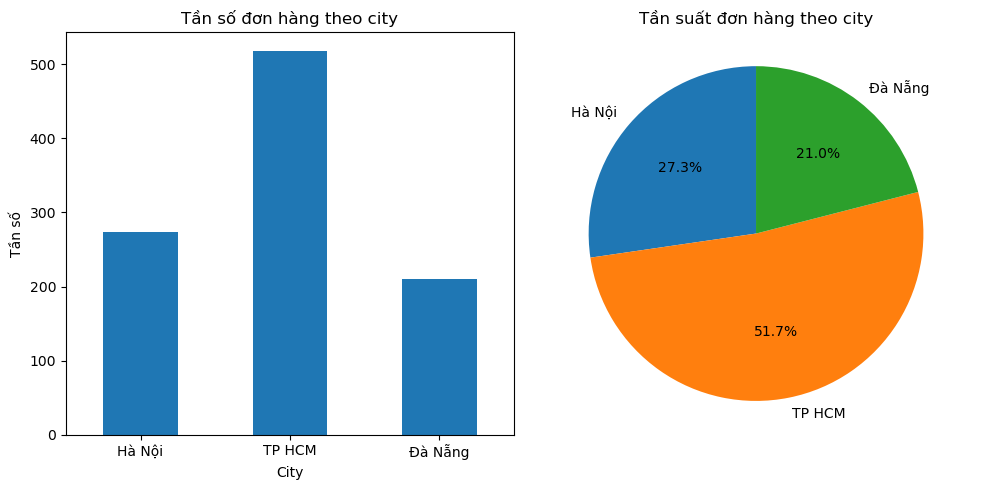

In [8]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart of frequency
freq_by_city.plot(kind='bar', ax=ax1)
ax1.set_xlabel(CN_CT)
ax1.set_ylabel('Tần số')
ax1.set_title(f'Tần số đơn hàng theo {CN_CT.lower()}')
ax1.tick_params(axis='x', rotation=0)

# Plot pie chart of proportion
prop_by_city.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title(f'Tần suất đơn hàng theo {CN_CT.lower()}')
ax2.axis('equal')

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ thì TP HCM đang dẫn đầu số đơn hàng, số đơn hàng TP HCM chiếm hơn phân nửa, Đà Nẵng xếp thấp nhất chỉ chiếm hơn 1/5 tổng số đơn hàng của 3 địa phương (Hà Nội, TP HCM, Đà Nẵng).

### Biều đồ tần số, tần suất theo gender

In [9]:
freq_by_gender = df.groupby([CN_GD]).size()
prop_by_gender = freq_by_gender * 100 / total_orders

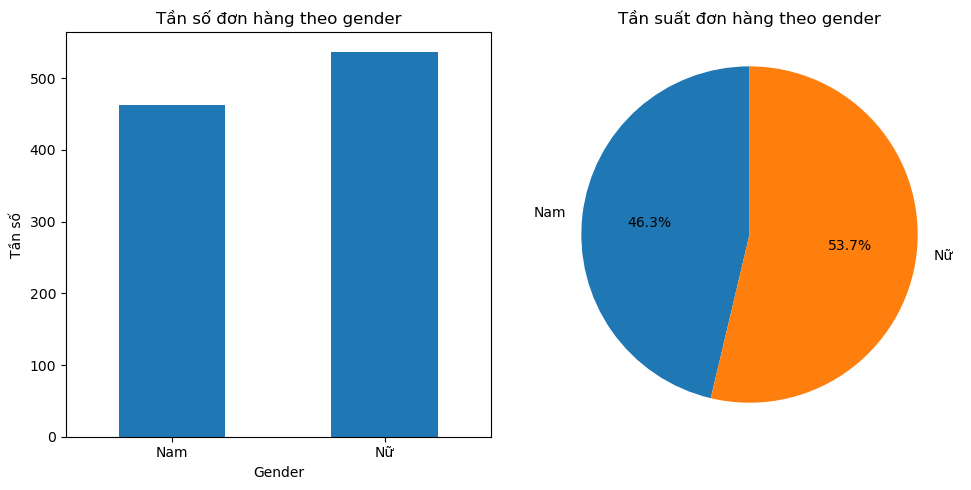

In [10]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart of frequency
freq_by_gender.plot(kind='bar', ax=ax1)
ax1.set_xlabel(CN_GD)
ax1.set_ylabel('Tần số')
ax1.set_title(f'Tần số đơn hàng theo {CN_GD.lower()}')
ax1.tick_params(axis='x', rotation=0)

# Plot pie chart of proportion
prop_by_gender.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title(f'Tần suất đơn hàng theo {CN_GD.lower()}')
ax2.axis('equal')

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ nhìn chung số đơn hàng của nữ mua nhiều hơn nam nhưng với tỉ chênh lệch không nhiều.

### Histogram total và rating

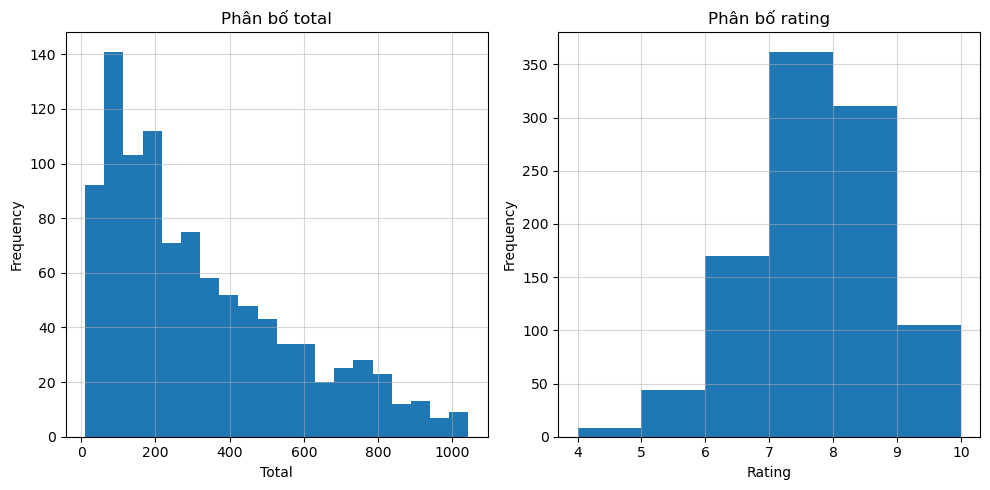

In [16]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram chart of total
ax1.hist(total, bins=20)
ax1.set_xlabel(CN_TT)
ax1.set_ylabel('Frequency')
ax1.set_title(f'Phân bố {CN_TT.lower()}')
ax1.grid(alpha=0.5)

# Plot histogram chart of rating
ax2.hist(rating, bins=6)
ax2.set_xlabel(CN_RT)
ax2.set_ylabel('Frequency')
ax2.set_title(f'Phân bố {CN_RT.lower()}')
ax2.grid(alpha=0.5)

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ nhìn chung số đơn hàng tỉ lệ nghịch với giá trị đơn hàng và đánh giá rating khá (từ 7 đến 8) chiếm đa số.

### Histogram total và rating theo city và gender

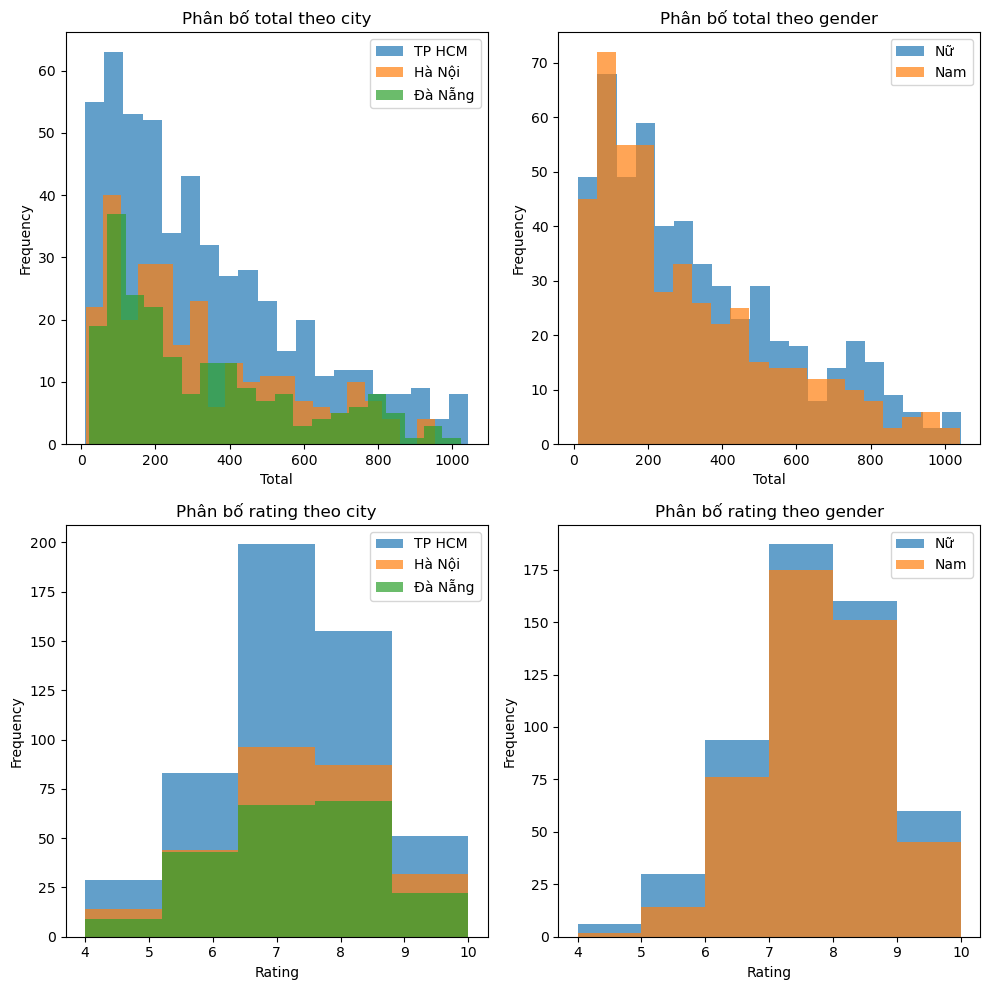

In [17]:
# Set size
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = axs.ravel()

# Plot histogram of total sales by city
for item in df.groupby(CN_CT)[CN_TT].sum().sort_values(ascending=False).index.tolist():
    ax1.hist(total[city == item], bins=20, alpha=0.7, label=item)
ax1.set_xlabel(CN_TT)
ax1.set_ylabel('Frequency')
ax1.set_title(f'Phân bố {CN_TT.lower()} theo {CN_CT.lower()}')
ax1.legend()

# Plot histogram of total sales by gender
for item in df.groupby(CN_GD)[CN_TT].sum().sort_values(ascending=False).index.tolist():
    ax2.hist(total[gender == item], bins=20, alpha=0.7, label=item)
ax2.set_xlabel(CN_TT)
ax2.set_ylabel('Frequency')
ax2.set_title(f'Phân bố {CN_TT.lower()} theo {CN_GD.lower()}')
ax2.legend()

# Plot histogram of ratings by city
for item in df.groupby(CN_CT)[CN_RT].sum().sort_values(ascending=False).index.tolist():
    ax3.hist(rating[city == item], bins=5, alpha=0.7, label=item)
ax3.set_xlabel(CN_RT)
ax3.set_ylabel('Frequency')
ax3.set_title(f'Phân bố {CN_RT.lower()} theo {CN_CT.lower()}')
ax3.legend()

# Plot histogram of ratings by gender
for item in df.groupby(CN_GD)[CN_RT].sum().sort_values(ascending=False).index.tolist():
    ax4.hist(rating[gender == item], bins=6, alpha=0.7, label=item)
ax4.set_xlabel(CN_RT)
ax4.set_ylabel('Frequency')
ax4.set_title(f'Phân bố {CN_RT.lower()} theo {CN_GD.lower()}')
ax4.legend()

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ nhìn chung các địa phương và giới tính đều có số đơn hàng tỉ lệ nghịch với giá trị đơn hàng, nữ chiếm đa số hơn nam, TP HCM đứng đầu và Đà Nẵng thì thấp nhất; địa phương và giới tính có số đơn hàng càng nhiều thì số lược đánh giá càng nhiều, cả 2 phân bố đều tập trung ở khoảng rating khá (từ 7 đến 8).

### Scatter total và rating

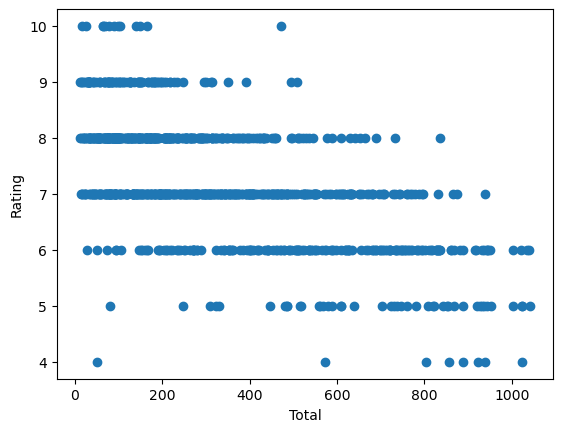

In [13]:
# Plot scatter chart
plt.scatter(total, rating)

# Set the x and y axis labels
plt.xlabel(CN_TT)
plt.ylabel(CN_RT)

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ nhìn chung những đánh giá thấp có xu hướng tăng khi giá trị đơn hàng càng cao.

### Tree-map product line

In [14]:
product_line_counts = df.groupby('Product line').size()

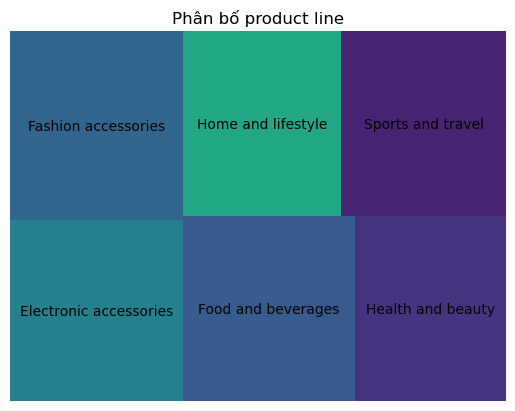

In [15]:
# Plot tree-map chart
squarify.plot(sizes=product_line_counts, label=product_line_counts.index)

# Remove axis labels
plt.axis('off')

# Set the title
plt.title('Phân bố product line')

# Display the plot
plt.show()

Nhận xét: dựa theo biểu đồ nhìn chung phân bố diện tích tree-map khá đồng đều.